## Aggregate Report (All Federations)

In [487]:
#install packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import re
import matplotlib
import wordcloud #conda install -c conda-forge wordcloud=1.2.1 
from wordcloud import WordCloud, STOPWORDS
import numpy as np
import sys
import warnings
warnings.filterwarnings('ignore')

### FedCentral

#### Session Duration

In [532]:
session_duration = pd.DataFrame()

session_duration['Date'] = ['October','November','December','January','February','March','April',
                                'May','June','July','August','September']

session_duration['Avg. Time Spend on Page'] = [view_user_oct['Avg. Time on Page'].mean(),
                                             view_user_nov['Avg. Time on Page'].mean(),view_user_dec['Avg. Time on Page'].mean(),view_user_jan['Avg. Time on Page'].mean(),
                                             view_user_feb['Avg. Time on Page'].mean(),view_user_mar['Avg. Time on Page'].mean(),view_user_apr['Avg. Time on Page'].mean(),
                                             view_user_may['Avg. Time on Page'].mean(),view_user_jun['Avg. Time on Page'].mean(),view_user_jul['Avg. Time on Page'].mean(),
                                             view_user_aug['Avg. Time on Page'].mean(),view_user_sep['Avg. Time on Page'].mean()]

session_duration.loc[12] = ['Average',session_duration['Avg. Time Spend on Page'].mean()]
session_duration['Avg. Time Spend on Page'] = pd.to_timedelta(round(session_duration['Avg. Time Spend on Page'],0),unit='m')

session_duration

,Date,Avg. Time Spend on Page
0,October,01:21:00
1,November,01:14:00
2,December,01:23:00
3,January,01:26:00
4,February,01:29:00
5,March,01:28:00
6,April,01:31:00
7,May,01:42:00
8,June,01:27:00
9,July,01:25:00


Average time spend on page is 1 minute and 27 seconds.

#### Total number of registered users

In [488]:
fedcentral_users = pd.read_csv('fedcentral_users_2019.csv')
federations = pd.read_csv('federations.csv')                                            

total_users = round(len(fedcentral_users)*80/100,0)
print('Fedcentral registered users - ', total_users)

fedcentral_users['Date Joined'] = fedcentral_users['Date Joined'].str.split(' ',expand=True)[0]
fedcentral_users['Last Login'] = fedcentral_users['Last Login'].str.split(' ',expand=True)[0]
fedcentral_users['Date Joined'].fillna('2013/12/31',inplace=True)
fedcentral_users['Date Joined'] = pd.to_datetime(fedcentral_users['Date Joined'])
fedcentral_users['Last Login'] = pd.to_datetime(fedcentral_users['Last Login'])
fedcentral_users_by_federation = pd.merge(fedcentral_users, federations[['name','code','type']], how='left',left_on = 'Federation', right_on = 'name')
fedcentral_users_by_federation_fed = set(fedcentral_users_by_federation[fedcentral_users_by_federation['type']=='yes']['Federation'])
federations_fed = set(federations[federations['type']=='yes']['name'])
total_fed = len(fedcentral_users_by_federation_fed)


fedcentral_users_past_year = len(set(fedcentral_users[(fedcentral_users['Last Login']>'09/30/2018') & (fedcentral_users_by_federation['Last Login']<'10/1/2019')]['Email']))
print('Fedcentral active users past year -', fedcentral_users_past_year) 

fedcentral_users_growth_rate = fedcentral_users[['Email','Date Joined']]
fedcentral_users_growth_rate.set_index('Date Joined',inplace=True)
print('Fedcentral new users since Oct 2018 - ', fedcentral_users_growth_rate['2018-09-30':'2019-10-01']['Email'].count())


total_registered_fed = fedcentral_users_by_federation_fed
print('Fedcentral #n federations with registered users', len(total_registered_fed))
print('Fedcentral % federations with registered users',round(len(fedcentral_users_by_federation_fed)*100/len(federations_fed),2))

fedcentral_users_by_federation_net = set(fedcentral_users_by_federation[fedcentral_users_by_federation['type']=='no']['Federation'])

print('Fedcentral #n networks with registered users', len(fedcentral_users_by_federation_net))
federations_net = set(federations[federations['type']=='no']['name'])
print('Fedcentral % networks with registered users', round(len(fedcentral_users_by_federation_net)*100/len(federations_net),2))


Fedcentral registered users -  3347.0
Fedcentral active users past year - 1744
Fedcentral new users since Oct 2018 -  420
Fedcentral #n federations with registered users 139
Fedcentral % federations with registered users 96.53
Fedcentral #n networks with registered users 47
Fedcentral % networks with registered users 15.93


As of October 1, 2019 4184 users are registered in FedCentral, 1744 users were active in Fedcentral within the past year (Oct 2018 - Oct 2019) and 420 users joined Fedcentral since October 1, 2018.

There are 3347 (assuming that 20% of registerede users left their organixzations) users are currently registered in FedCentral. 
139 federations have registered FedCentral memebers.  It's almost 97% of all federations. 47 networks have registered FedCentral memebers.  It's almost 16% of all networks. Federations that don't have registered FedCentral users are shown below:

In [489]:
for fed in federations_fed:
    if fed not in fedcentral_users_by_federation_fed:
        print(fed)

UJA Federation of Hamilton
Jewish Federation of Pinellas & Pasco Counties
The Jewish Federation of Raleigh-Cary
The Jewish Federation of Greater Austin
Jewish Federation of Greater Rockford


In [490]:
print(round(fedcentral_users_by_federation[fedcentral_users_by_federation['type']=='yes']['Email'].count()*100/len(fedcentral_users),2))
print(round(fedcentral_users_by_federation[fedcentral_users_by_federation['type']=='no']['Email'].count()*100/len(fedcentral_users),2))

83.34
8.82


83% of registered users belong to Federations and 9% of registered users belong to Networks. 

In [491]:
fedcentral_users_growth_cumsum = pd.DataFrame(fedcentral_users_growth_rate.resample('Y')['Email'].count())
fedcentral_users_growth_cumsum.columns=['# New Users']
fedcentral_users_growth_cumsum['Year'] = ['2013','2014','2015','2016','2017','2018','2019']
fedcentral_users_growth_cumsum['Total Users'] = fedcentral_users_growth_cumsum['# New Users'].cumsum().values
fedcentral_users_growth_cumsum.reset_index(inplace=True)
fedcentral_users_growth_cumsum[['Year','# New Users','Total Users']]
fedcentral_users_growth_cumsum['% change'] = round(fedcentral_users_growth_cumsum['Total Users'].pct_change()*100,2)
fedcentral_users_growth_cumsum.loc[2,'# New Users'] = fedcentral_users_growth_cumsum.loc[0:2,'# New Users'].sum() 
fedcentral_users_growth_cumsum.drop(['Date Joined'],axis=1,inplace=True)
fedcentral_users_growth_cumsum.drop(fedcentral_users_growth_cumsum.index[0:2],inplace=True)
fedcentral_users_growth_cumsum[['Year','# New Users','Total Users','% change']]

,Year,# New Users,Total Users,% change
2,2015,1067,1067,14.24
3,2016,1671,2738,156.61
4,2017,668,3406,24.40
5,2018,480,3886,14.09
6,2019,298,4184,7.67


In [492]:
round(fedcentral_users_growth_cumsum['# New Users'].mean(),0)

837.0

420 users joined FedCentral within the past year. On average 837 users join FedCentral every year since 2015.  The graph above shows the growth rate of registered users of Fedcentral.

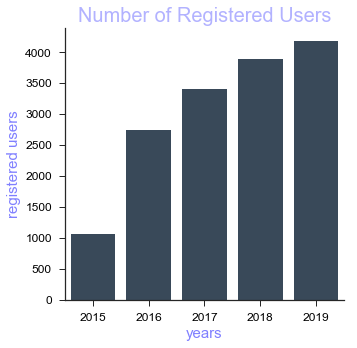

In [493]:
sns.set(style="ticks")

flatui = ["#34495e"]

# This Function takes as input a custom palette
g = sns.barplot(x='Year', y='Total Users', palette=sns.color_palette(flatui),data=fedcentral_users_growth_cumsum,ci=None)

flatui = ["#34495a"]

# remove the top and right line in graph
sns.despine()

# Set the size of the graph from here
g.figure.set_size_inches(5,5)
# Set the Title of the graph from here
g.axes.set_title('Number of Registered Users',
    fontsize=20,color="b",alpha=0.3)
# Set the xlabel of the graph from here
g.set_xlabel("years",size = 15,color="b",alpha=0.5)
# Set the ylabel of the graph from here
g.set_ylabel("registered users",size = 15,color="b",alpha=0.5)
# Set the ticklabel size and color of the graph from here
g.tick_params(labelsize=12,labelcolor="black")

#### FedCentral: Number of active users per day

In [494]:
active_users_daily = pd.read_csv('active_users_daily_2019.csv',skiprows=1,names=['date','active_users'])
users_daily = round(active_users_daily[active_users_daily['active_users']>30].active_users.mean(),0)
users_daily

192.0

On average 192 FedCentral members use FedCentral daily(weekends and holidays were excluded).

#### FedCentral: Number of active users per week

In [495]:
active_users_weekly = pd.read_csv('active_users_weekly_2019.csv',skiprows=1,names=['date','active_users'])
users_weekly = round(active_users_weekly.active_users.mean()*1.15,0)
users_weekly

799.0

On average 799 FedCentral members use FedCentral monthly (weekends and holidays were excluded).

#### FedCentral: Number of active users per month (average number of unique visits per month)

In [496]:
active_users_fedweb_bloomfire = pd.DataFrame()
active_users_fedweb_bloomfire['platform'] = ['FedCentral (views + downloads + searches)','Bloomfire','FedCentral + Bloomfire']
fedweb_active = set(fedcentral_users[fedcentral_users['Last Login'] < '1/1/2019']['Email'].str.lower())
active_bloom = set(members_bloomfire['Email'].str.lower())
active_users_fedweb_bloomfire['# active users'] = [len(fedweb_active),
                                             len(active_bloom),
                                             len(set(active_bloom.union(fedweb_active)))]
active_users_fedweb_bloomfire['% registered'] = [len(fedweb_active)/len(fedcentral_users),len(active_bloom)/len(fedcentral_users),len(active_bloom.union(fedweb_active))/len(fedcentral_users)]  
active_users_fedweb_bloomfire['% registered'] = round(active_users_fedweb_bloomfire['% registered']*100,2)
active_users_fedweb_bloomfire   

,platform,# active users,% registered
0,FedCentral (views + downloads + searches),2442,58.37
1,Bloomfire,1426,34.08
2,FedCentral + Bloomfire,3547,84.78


The table above shows that 58% of users were active on Fedcentral, 62% of users were active in Bloomfire and almost 93% of all registered users were active in both systems (FedCentral + Bloomfire) within the past year.

The table below shows average number of non-unique active users per month (calculated by Google Analytics).

In [497]:
active_users_monthly = pd.read_csv('active_users_monthly_2019.csv',skiprows=1,names=['date','Active Users'],parse_dates=["date"], index_col="date")
active_users_monthly = round(active_users_monthly.resample('M')['Active Users'].mean()*1.25,0)
active_users_monthly = pd.DataFrame(({'Month':active_users_monthly.index, 'Active Users':active_users_monthly.values}))
active_users_monthly['Month'] = ['October','November','December','January','February','March','April','May','June','July','August','September']
active_users_monthly['% Registered Users'] = round(active_users_monthly['Active Users']*100/len(fedcentral_users),2)
active_users_monthly.loc[12] = ['Average', active_users_monthly['Active Users'].mean(), active_users_monthly['% Registered Users'].mean()]
active_users_monthly.style.applymap('font-weight:bold;',subset=active_users_monthly.loc[12])
round(active_users_monthly,2)

,Month,Active Users,% Registered Users
0,October,2194.0,52.44
1,November,3043.0,72.73
2,December,2740.0,65.49
3,January,2385.0,57.00
4,February,2578.0,61.62
5,March,2465.0,58.91
6,April,2726.0,65.15
7,May,2955.0,70.63
8,June,3115.0,74.45
9,July,3109.0,74.31


In [498]:
view_user_oct = pd.read_csv('views_user_oct_2019.csv')
view_user_nov = pd.read_csv('views_user_nov_2019.csv')
view_user_dec = pd.read_csv('views_user_dec_2019.csv')
view_user_jan = pd.read_csv('views_user_jan_2019.csv')
view_user_feb = pd.read_csv('views_user_feb_2019.csv')
view_user_mar = pd.read_csv('views_user_mar_2019.csv')
view_user_apr = pd.read_csv('views_user_apr_2019.csv')
view_user_may = pd.read_csv('views_user_may_2019.csv')
view_user_jun = pd.read_csv('views_user_jun_2019.csv')
view_user_jul = pd.read_csv('views_user_jul_2019.csv')
view_user_aug = pd.read_csv('views_user_aug_2019.csv')
view_user_sep = pd.read_csv('views_user_sep_2019.csv')


view_user_nov['Avg. Time on Page']=pd.to_timedelta(view_user_nov['Avg. Time on Page']).dt.total_seconds()
view_user_dec['Avg. Time on Page']=pd.to_timedelta(view_user_dec['Avg. Time on Page']).dt.total_seconds()
view_user_jan['Avg. Time on Page']=pd.to_timedelta(view_user_jan['Avg. Time on Page']).dt.total_seconds()
view_user_feb['Avg. Time on Page']=pd.to_timedelta(view_user_feb['Avg. Time on Page']).dt.total_seconds()
view_user_mar['Avg. Time on Page']=pd.to_timedelta(view_user_mar['Avg. Time on Page']).dt.total_seconds()
view_user_apr['Avg. Time on Page']=pd.to_timedelta(view_user_apr['Avg. Time on Page']).dt.total_seconds()
view_user_may['Avg. Time on Page']=pd.to_timedelta(view_user_may['Avg. Time on Page']).dt.total_seconds()
view_user_jun['Avg. Time on Page']=pd.to_timedelta(view_user_jun['Avg. Time on Page']).dt.total_seconds()
view_user_jul['Avg. Time on Page']=pd.to_timedelta(view_user_jul['Avg. Time on Page']).dt.total_seconds()
view_user_aug['Avg. Time on Page']=pd.to_timedelta(view_user_aug['Avg. Time on Page']).dt.total_seconds()
view_user_sep['Avg. Time on Page']=pd.to_timedelta(view_user_sep['Avg. Time on Page']).dt.total_seconds()
view_user_oct['Avg. Time on Page']=pd.to_timedelta(view_user_oct['Avg. Time on Page']).dt.total_seconds()

active_users_monthly = pd.DataFrame()
active_users_monthly['Month'] = ['October','November','December','January','February','March','April',
                                'May','June','July','August','September']
active_users_monthly['# Active FedCentral Users'] = [len(set(view_user_oct['User'])),len(set(view_user_nov['User'])),len(set(view_user_dec['User'])),len(set(view_user_jan['User'])),
                                        len(set(view_user_feb['User'])),len(set(view_user_mar['User'])), len(set(view_user_apr['User'])),
                                        len(set(view_user_may['User'])),len(set(view_user_jun['User'])), len(set(view_user_jul['User'])),
                                        len(set(view_user_aug['User'])),len(set(view_user_sep['User']))]


active_users_monthly['% Registered Users'] = round(active_users_monthly['# Active FedCentral Users']*100/len(fedcentral_users),2)


active_users_monthly['# Active Bloomfire Users'] = [len(set(member_bloomfire_oct['Email'])),len(set(member_bloomfire_nov['Email'])),len(set(member_bloomfire_dec['Email'])),len(set(member_bloomfire_jan['Email'])),
                                        len(set(member_bloomfire_feb['Email'])),len(set(member_bloomfire_mar['Email'])), len(set(member_bloomfire_apr['Email'])),
                                        len(set(member_bloomfire_may['Email'])),len(set(member_bloomfire_jun['Email'])), len(set(member_bloomfire_jul['Email'])),
                                        len(set(member_bloomfire_aug['Email'])),len(set(member_bloomfire_sep['Email']))]

active_users_monthly['%   Registered Users'] = round(active_users_monthly['# Active Bloomfire Users']*100/total_users,2)

active_users_monthly['Est. #  Active FedCentral+Bloomfire Users'] = round(active_users_monthly['# Active FedCentral Users']*100/59.5,0)
active_users_monthly['%  Registered Users'] = round(active_users_monthly['Est. #  Active FedCentral+Bloomfire Users']*100/len(fedcentral_users),2)

users_monthly = active_users_monthly['# Active FedCentral Users'].mean()
active_users_monthly.loc[12] = ['Average', active_users_monthly['# Active FedCentral Users'].mean(),active_users_monthly['% Registered Users'].mean(),
                                active_users_monthly['# Active Bloomfire Users'].mean(), active_users_monthly['%   Registered Users'].mean(),
                              active_users_monthly['Est. #  Active FedCentral+Bloomfire Users'].mean(),active_users_monthly['%  Registered Users'].mean()]

active_users_monthly[['# Active FedCentral Users','# Active Bloomfire Users','Est. #  Active FedCentral+Bloomfire Users']] = round(active_users_monthly[['# Active FedCentral Users','# Active Bloomfire Users','Est. #  Active FedCentral+Bloomfire Users']],0)
active_users_monthly[['% Registered Users','%  Registered Users','%   Registered Users']] = round(active_users_monthly[['% Registered Users','%  Registered Users','%   Registered Users']],2)
active_users_monthly

,Month,# Active FedCentral Users,% Registered Users,# Active Bloomfire Users,% Registered Users,Est. # Active FedCentral+Bloomfire Users,% Registered Users
0,October,601.0,14.36,467.0,13.95,1010.0,24.14
1,November,602.0,14.39,572.0,17.09,1012.0,24.19
2,December,520.0,12.43,536.0,16.01,874.0,20.89
3,January,520.0,12.43,558.0,16.67,874.0,20.89
4,February,486.0,11.62,474.0,14.16,817.0,19.53
5,March,552.0,13.19,580.0,17.33,928.0,22.18
6,April,549.0,13.12,508.0,15.18,923.0,22.06
7,May,540.0,12.91,527.0,15.75,908.0,21.70
8,June,617.0,14.75,441.0,13.18,1037.0,24.78
9,July,549.0,13.12,469.0,14.01,923.0,22.06


The monthly average number of active FedCentral users is 551 (see the last row of the table above) while the estimated monthly average number of active FedCentral+Bloomfire users is 926. It's 13% and 22% of all registered users.

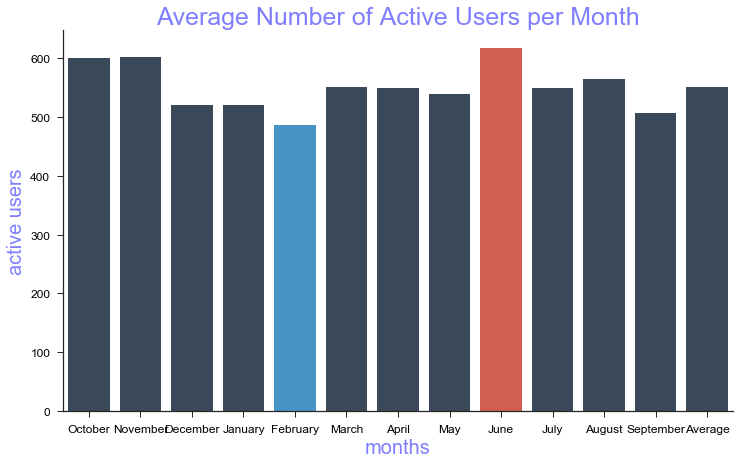

In [499]:
sns.set(style="ticks")

flatui = ["#34495e", "#34495e", "#34495e", "#34495e", "#3498db","#34495e","#34495e","#34495e", "#e74c3c","#34495e","#34495e","#34495e"]

# This Function takes as input a custom palette
g = sns.barplot(x="Month", y="# Active FedCentral Users", palette=sns.color_palette(flatui),data=active_users_monthly,ci=None)

# remove the top and right line in graph
sns.despine()

# Set the size of the graph from here
g.figure.set_size_inches(12,7)
# Set the Title of the graph from here
g.axes.set_title('Average Number of Active Users per Month',
    fontsize=25,color="b",alpha=0.5)
# Set the xlabel of the graph from here
g.set_xlabel("months",size = 20,color="b",alpha=0.5)
# Set the ylabel of the graph from here
g.set_ylabel("active users",size = 20,color="b",alpha=0.5)
# Set the ticklabel size and color of the graph from here
g.tick_params(labelsize=12,labelcolor="black")

In [500]:
active_users_fedcentral = pd.DataFrame()
active_users_fedcentral['Time Period'] = ['Daily','Weekly','Monthly']

views1_date = pd.read_csv('views1_date_2019.csv')
views2_date = pd.read_csv('views2_date_2019.csv')
views3_date = pd.read_csv('views3_date_2019.csv')
views4_date = pd.read_csv('views4_date_2019.csv')
views5_date = pd.read_csv('views5_date_2019.csv')
views6_date = pd.read_csv('views6_date_2019.csv')
views7_date = pd.read_csv('views7_date_2019.csv')
views8_date = pd.read_csv('views8_date_2019.csv')
views9_date = pd.read_csv('views9_date_2019.csv')
views10_date = pd.read_csv('views10_date_2019.csv')

views_date = pd.concat([views1_date,views2_date,views3_date,views4_date,views5_date,views6_date,views8_date,views9_date,views10_date])
views_date['Date'] = pd.to_datetime(views_date['Date'], format='%Y%m%d')
views_date.set_index('Date',inplace=True)

views1_user = pd.read_csv('views1_user_2019.csv')
views2_user = pd.read_csv('views2_user_2019.csv')
views3_user = pd.read_csv('views3_user_2019.csv')
views4_user = pd.read_csv('views4_user_2019.csv')
views5_user = pd.read_csv('views5_user_2019.csv')
views6_user = pd.read_csv('views6_user_2019.csv')
views7_user = pd.read_csv('views7_user_2019.csv')
views8_user = pd.read_csv('views8_user_2019.csv')
views9_user = pd.read_csv('views9_user_2019.csv')


views_user = pd.concat([views1_user,views2_user,views3_user,views4_user,views5_user,views6_user,views7_user,views8_user,views9_user])

active_users_fedcentral['Average Active Users'] = [users_daily,users_weekly,users_monthly]
active_users_fedcentral['% Registered Users'] = round(active_users_fedcentral['Average Active Users']/len(total_registered_fed),2)


#### Percent of Federations using FedCentral

In [501]:
print(len(total_registered_fed))
total_active_registered_fed = set(fedcentral_users_by_federation[(fedcentral_users['Last Login']>'2018/09/30') & (fedcentral_users_by_federation['type']=='yes')]['Federation'])
print(len(total_active_registered_fed))
print(round(len(total_active_registered_fed)*100/len(total_registered_fed),2))

139
130
93.53


Users from 139 federations are registered on FedCentral. Users from 130 federations were active (logged in at least ones within the past year) on FedCentral within the past year. It means that 94% of registered federations used FedCentral within the past year. Federations that weren't active within the past year are displayed below:

In [502]:
for fed in total_registered_fed:
    if fed not in total_active_registered_fed:
        print(fed)

Merrimack Valley Jewish Federation
Jewish Federation of New Mexico
Jewish Federation of Greater Des Moines
Flint Jewish Federation
Jewish Federation of Springfield, Illinois
Jewish Federation of Peoria
Windsor Jewish Federation
Jewish Federation of the Quad Cities
Jewish Federation of Volusia & Flagler Counties


In [503]:
total_registered_net = set(fedcentral_users_by_federation[fedcentral_users_by_federation['type']=='no']['Federation'])
print(len(total_registered_net))
total_active_registered_net = set(fedcentral_users_by_federation[(fedcentral_users['Last Login']>'2018/10/01') & (fedcentral_users_by_federation['type']=='no')]['Federation'])
print(len(total_active_registered_net))
print(round(len(total_active_registered_net)/len(total_registered_net)*100,0))

47
42
89.0


Users from 47 networks are registered on FedCentral. Users from 42 networks were active (logged in at least ones within the past year) on FedCentral within the past year. It means that 89% of registered networks used FedCentral within the past year. Networks that weren't active within the past year are displayed below:

In [504]:
for net in total_registered_net:
    if net not in total_active_registered_net:
        print(net)

North Louisiana Jewish Federation
Athens Jewish Welfare Fund
ALABAMA-NIUC
OREGON
Ithaca Area United Jewish Community


In [505]:
users_fedcentral = pd.DataFrame(columns=['category','# registered','% registered','# active past year','% active past year'])
users_fedcentral['category'] = ['Users','Ferderations','Newtworks']
users_fedcentral['# registered'] = [total_users,len(total_registered_fed),len(total_registered_net)]
users_fedcentral['% registered'] = ['NaN', round(len(total_registered_fed)*100/len(federations_fed),2),round(len(total_registered_net)*100/len(federations_net),2)]
users_fedcentral['# active past year'] = [fedcentral_users_past_year,len(total_active_registered_fed),len(total_active_registered_net)]
users_fedcentral['% active past year'] = ['NaN',round(len(total_active_registered_fed)*100/len(total_registered_fed),2),round(len(total_active_registered_net)*100/len(total_registered_net),2)]
users_fedcentral

,category,# registered,% registered,# active past year,% active past year
0,Users,3347.0,NaN,1744,NaN
1,Ferderations,139.0,96.53,130,93.53
2,Newtworks,47.0,15.93,42,89.36


#### Page views, assets downloads, assets views and searches Oct 2018 - Oct 2019

In [506]:
views1_fed = pd.read_csv('views1_fed_2019.csv')
views2_fed = pd.read_csv('views2_fed_2019.csv')
views3_fed = pd.read_csv('views3_fed_2019.csv')
views4_fed = pd.read_csv('views4_fed_2019.csv')
views5_fed = pd.read_csv('views5_fed_2019.csv')
views6_fed = pd.read_csv('views6_fed_2019.csv')
views7_fed = pd.read_csv('views7_fed_2019.csv')
views8_fed = pd.read_csv('views8_fed_2019.csv')

views_fed = pd.concat([views1_fed,views2_fed,views3_fed,views4_fed,views5_fed,views6_fed,views7_fed,views8_fed])
views_fed = pd.merge(views_fed,federations[['code','name','type']],how='left',left_on = 'User Organization', right_on = 'code')
views_fed_fed = views_fed[views_fed['type']=='yes']['User Organization']
views_fed_net = views_fed[views_fed['type']=='no']['User Organization']

searches1_fed = pd.read_csv('searches1_fed_2019.csv')
searches2_fed = pd.read_csv('searches2_fed_2019.csv')
searches3_fed = pd.read_csv('searches3_fed_2019.csv')
searches4_fed = pd.read_csv('searches4_fed_2019.csv')
searches5_fed = pd.read_csv('searches5_fed_2019.csv')
searches6_fed = pd.read_csv('searches6_fed_2019.csv')
searches7_fed = pd.read_csv('searches7_fed_2019.csv')
searches8_fed = pd.read_csv('searches8_fed_2019.csv')
searches9_fed = pd.read_csv('searches9_fed_2019.csv')
searches10_fed = pd.read_csv('searches10_fed_2019.csv')


searches_fed = pd.concat([searches1_fed,searches2_fed,searches3_fed,searches4_fed,searches5_fed,searches6_fed,
                         searches7_fed,searches8_fed,searches9_fed,searches10_fed])
#searches_fed = searches_fed[searches_fed['Event Label']!='(not set)']
searches_fed = pd.merge(searches_fed,federations[['code','name','type']],how='left',left_on = 'User Organization', right_on = 'code')
searches_fed_fed = searches_fed[searches_fed['type']=='yes']['User Organization']
searches_fed_net = searches_fed[searches_fed['type']=='no']['User Organization']


downloads1_fed = pd.read_csv('downloads1_fed_2019.csv')
downloads2_fed = pd.read_csv('downloads2_fed_2019.csv')
downloads3_fed = pd.read_csv('downloads3_fed_2019.csv')
downloads4_fed = pd.read_csv('downloads4_fed_2019.csv')

downloads_fed = pd.concat([downloads1_fed,downloads2_fed,downloads3_fed,downloads4_fed])
downloads_fed = pd.merge(downloads_fed,federations[['code','name','type']],how='left',left_on = 'User Organization', right_on = 'code')
downloads_fed_fed = downloads_fed[downloads_fed['type']=='yes']['User Organization']
downloads_fed_net = downloads_fed[downloads_fed['type']=='no']['User Organization']


active_users_fedcentral = pd.DataFrame()
active_users_fedcentral['Time Period'] = ['Daily','Weekly','Monthly']

downloads1_date = pd.read_csv('downloads1_date_2019.csv')
downloads2_date = pd.read_csv('downloads2_date_2019.csv')
downloads3_date = pd.read_csv('downloads3_date_2019.csv')
downloads4_date = pd.read_csv('downloads4_date_2019.csv')

downloads_date = pd.concat([downloads1_date,downloads2_date,downloads3_date,downloads4_date])
downloads_date['Date'] = pd.to_datetime(downloads_date['Date'], format='%Y%m%d')
downloads_date.set_index('Date',inplace=True)

searches1_date = pd.read_csv('searches1_date_2019.csv')
searches2_date = pd.read_csv('searches2_date_2019.csv')
searches3_date = pd.read_csv('searches3_date_2019.csv')
searches4_date = pd.read_csv('searches4_date_2019.csv')
searches5_date = pd.read_csv('searches5_date_2019.csv')
searches6_date = pd.read_csv('searches6_date_2019.csv')
searches7_date = pd.read_csv('searches7_date_2019.csv')
searches8_date = pd.read_csv('searches8_date_2019.csv')
searches9_date = pd.read_csv('searches9_date_2019.csv')
searches10_date = pd.read_csv('searches10_date_2019.csv')
searches11_date = pd.read_csv('searches11_date_2019.csv')

searches_date = pd.concat([searches1_date,searches2_date,searches3_date,searches4_date,searches5_date,searches6_date,
                          searches7_date,searches8_date,searches9_date,searches10_date,searches11_date])
searches_date = searches_date[searches_date['Event Label']!='(not set)']
searches_date['Date'] = pd.to_datetime(searches_date['Date'], format='%Y%m%d')
searches_date.set_index('Date',inplace=True)

downloads1_user = pd.read_csv('downloads1_user_2019.csv')
downloads2_user = pd.read_csv('downloads2_user_2019.csv')
downloads3_user = pd.read_csv('downloads3_user_2019.csv')
downloads4_user = pd.read_csv('downloads4_user_2019.csv')

downloads_user = pd.concat([downloads1_user,downloads2_user,downloads3_user,downloads4_user])

searches1_user = pd.read_csv('searches1_user.csv')
searches2_user = pd.read_csv('searches2_user.csv')
searches3_user = pd.read_csv('searches3_user.csv')
searches4_user = pd.read_csv('searches4_user.csv')
searches5_user = pd.read_csv('searches5_user.csv')
searches6_user = pd.read_csv('searches6_user.csv')
searches7_user = pd.read_csv('searches7_user.csv')
searches8_user = pd.read_csv('searches8_user.csv')
searches9_user = pd.read_csv('searches9_user.csv')
searches10_user = pd.read_csv('searches10_user.csv')
searches11_user = pd.read_csv('searches11_user.csv')
searches_user = pd.concat([searches1_user, searches2_user, searches3_user,searches4_user,searches5_user,searches6_user,
                           searches7_user,searches8_user,searches9_user,searches10_user,searches11_user])


table1 = pd.DataFrame(columns=['Event Type','Total Past Year','Monthly Average','# users Past Year','# federations','% federations','#networks','% networks'])
table1['Event Type'] = ['page views','assets downloads','assets downloads + views','searches']
table1['Total Past Year'] = [views_date['Pageviews'].sum(),downloads_date['Total Events'].sum(),
                             views_date[views_date['Page'].str.contains('/view')]['Pageviews'].sum()+downloads_date['Total Events'].sum(),
                             searches_date['Total Events'].sum()]
table1['Monthly Average'] = [round(views_date.resample('M')['Pageviews'].sum().mean(),2),round(downloads_date.resample('M')['Total Events'].sum().mean(),2),
                             round(downloads_date.resample('M')['Total Events'].sum().mean(),2)+round(views_date[views_date['Page'].str.contains('/view')].resample('M')['Pageviews'].sum().mean(),2),
                             round(searches_date.resample('M')['Total Events'].sum().mean(),2)]
table1['# users Past Year'] = [len(set(views_user['User'])),len(set(downloads_user['User'])),
                               len(set(downloads_user['User']))+len(set(views_user[views_user['Page'].str.contains('/view')]['User'])),
                               len(set(searches_user['User']))]
table1['# federations'] = [len(set(views_fed_fed)),len(set(downloads_fed_fed)),
                           len(set(pd.concat([views_fed[(views_fed['Page'].str.contains('/view')) & (views_fed['type']=='yes')]['User Organization'],downloads_fed_fed]))),
                           len(set(searches_fed_fed))]
table1['% federations'] = [round(len(set(views_fed_fed))*100/len(total_registered_fed),2),round(len(set(downloads_fed_fed))*100/len(total_registered_fed),2),
                           round(len(set(pd.concat([views_fed[(views_fed['Page'].str.contains('/view')) & (views_fed['type']=='yes')]['User Organization'],downloads_fed_fed])))*100/len(total_registered_fed),2),
                           round(len(set(searches_fed_fed))*100/len(total_registered_fed),2)]
table1['#networks'] = [len(set(views_fed_net)),len(set(downloads_fed_net)),
                       len(set(pd.concat([views_fed[(views_fed['Page'].str.contains('/view')) & (views_fed['type']=='no')]['User Organization'],downloads_fed_net]))),
                       len(set(searches_fed_net))]
table1['% networks'] = [round(len(set(views_fed_net))*100/len(total_registered_net)),round(len(set(downloads_fed_net))*100/len(total_registered_net),2),
                        round(len(set(pd.concat([views_fed[(views_fed['Page'].str.contains('/view')) & (views_fed['type']=='no')]['User Organization'],
                                                 downloads_fed_net])))*100/len(total_registered_net),2),round(len(set(searches_fed_net))*100/len(total_registered_net),2)]
table1

,Event Type,Total Past Year,Monthly Average,# users Past Year,# federations,% federations,#networks,% networks
0,page views,181708,15142.33,1680,140,100.72,37,79.00
1,assets downloads,21582,1798.50,1142,138,99.28,30,63.83
2,assets downloads + views,53972,4497.67,2467,139,100.00,32,68.09
3,searches,43691,3640.92,1036,134,96.40,22,46.81


In [507]:
monthly_stats = pd.DataFrame()
monthly_stats['Month'] = ['October','November','December','January','February','March','April','May','June','July','August','September']

monthly_stats['Page Views'] = [view_user_oct['Pageviews'].sum(),
                               view_user_nov['Pageviews'].sum(),view_user_dec['Pageviews'].sum(),view_user_jan['Pageviews'].sum(),
                               view_user_feb['Pageviews'].sum(),view_user_mar['Pageviews'].sum(),view_user_apr['Pageviews'].sum(),
                               view_user_may['Pageviews'].sum(),view_user_jun['Pageviews'].sum(),view_user_jul['Pageviews'].sum(),
                               view_user_aug['Pageviews'].sum(),view_user_sep['Pageviews'].sum()]

monthly_stats['Avg. Time Spend on Page'] = [ view_user_oct['Avg. Time on Page'].mean(), view_user_nov['Avg. Time on Page'].mean(),view_user_dec['Avg. Time on Page'].mean(),view_user_jan['Avg. Time on Page'].mean(),
                                             view_user_feb['Avg. Time on Page'].mean(),view_user_mar['Avg. Time on Page'].mean(),view_user_apr['Avg. Time on Page'].mean(),
                                             view_user_may['Avg. Time on Page'].mean(),view_user_jun['Avg. Time on Page'].mean(),view_user_jul['Avg. Time on Page'].mean(),
                                             view_user_aug['Avg. Time on Page'].mean(),view_user_sep['Avg. Time on Page'].mean()]
monthly_stats['Downloads'] = ''
monthly_stats['Searches'] = ''


monthly_stats.loc[12] = ['Average', round(monthly_stats['Page Views'].mean(),2), monthly_stats['Avg. Time Spend on Page'].mean(),' ',' ']
monthly_stats['Avg. Time Spend on Page'] = pd.to_timedelta(round(monthly_stats['Avg. Time Spend on Page'],0),unit='m')

monthly_stats

,Month,Page Views,Avg. Time Spend on Page,Downloads,Searches
0,October,9516.00,01:21:00,,
1,November,10782.00,01:14:00,,
2,December,8936.00,01:23:00,,
3,January,10213.00,01:26:00,,
4,February,9468.00,01:29:00,,
5,March,10908.00,01:28:00,,
6,April,10877.00,01:31:00,,
7,May,12042.00,01:42:00,,
8,June,10006.00,01:27:00,,
9,July,11981.00,01:25:00,,


See the last raw for average numbers.

### Bloomfire

#### Bloomfire users

In [508]:
members_bloomfire_total = pd.read_csv('members_bloomfire.csv')
members_bloomfire = pd.read_csv('members_bloomfire_2019.csv')
members_bloomfire_by_federation = pd.merge(members_bloomfire, federations[['name','code','type']], how='left',left_on = 'Organization', right_on = 'name')

In [509]:
print('Bloomfire registered users - ', len(members_bloomfire_total))
print(round(len(members_bloomfire_total)*100/total_users,2))

print('Bloomfire active users past year - ', len(members_bloomfire))
print(round(len(members_bloomfire)*100/fedcentral_users_past_year,2))

Bloomfire registered users -  2586
77.26
Bloomfire active users past year -  1426
81.77


As of Octoberv 1, 2019 2586 users are registered in Bloomfire. It's 77% of all registered Fedcentral users.
1426 FedCentral members were active in Bloomfire within the past year. It's 82% percent of active FedCentral users.

In [510]:
member_bloomfire_oct = pd.read_csv('member_bloomfire_oct_2019.csv')
member_bloomfire_nov = pd.read_csv('member_bloomfire_nov_2019.csv')
member_bloomfire_dec = pd.read_csv('member_bloomfire_dec_2019.csv')
member_bloomfire_jan = pd.read_csv('member_bloomfire_jan_2019.csv')
member_bloomfire_feb = pd.read_csv('member_bloomfire_feb_2019.csv')
member_bloomfire_mar = pd.read_csv('member_bloomfire_mar_2019.csv')
member_bloomfire_apr = pd.read_csv('member_bloomfire_apr_2019.csv')
member_bloomfire_may = pd.read_csv('member_bloomfire_may_2019.csv')
member_bloomfire_jun = pd.read_csv('member_bloomfire_jun_2019.csv')
member_bloomfire_jul = pd.read_csv('member_bloomfire_jul_2019.csv')
member_bloomfire_aug = pd.read_csv('member_bloomfire_aug_2019.csv')
member_bloomfire_sep = pd.read_csv('member_bloomfire_sep_2019.csv')


bloomfire_active_users_monthly = pd.DataFrame()
bloomfire_active_users_monthly['Month'] = ['October','November','December','January','February','March','April','May','June','July','August','September']
bloomfire_active_users_monthly['Active Users'] = [len(set(member_bloomfire_oct['Email'])),len(set(member_bloomfire_nov['Email'])),len(set(member_bloomfire_dec['Email'])),len(set(member_bloomfire_jan['Email'])),
                                        len(set(member_bloomfire_feb['Email'])),len(set(member_bloomfire_mar['Email'])), len(set(member_bloomfire_apr['Email'])),
                                        len(set(member_bloomfire_may['Email'])),len(set(member_bloomfire_jun['Email'])), len(set(member_bloomfire_jul['Email'])),
                                        len(set(member_bloomfire_aug['Email'])),len(set(member_bloomfire_sep['Email']))]
bloomfire_active_users_monthly['% Registered Users'] = round(bloomfire_active_users_monthly['Active Users']/active_users_monthly['# Active FedCentral Users'],2)*100
bloomfire_active_users_monthly.loc[12] = ['Average',  bloomfire_active_users_monthly['Active Users'].mean(), bloomfire_active_users_monthly['% Registered Users'].mean()]

bloomfire_active_users_monthly

,Month,Active Users,% Registered Users
0,October,467.0,78.00
1,November,572.0,95.00
2,December,536.0,103.00
3,January,558.0,107.00
4,February,474.0,98.00
5,March,580.0,105.00
6,April,508.0,93.00
7,May,527.0,98.00
8,June,441.0,71.00
9,July,469.0,85.00


On average 508 users are active in Bloomfire monthly. It's 92% of montly active Fedcentral users.

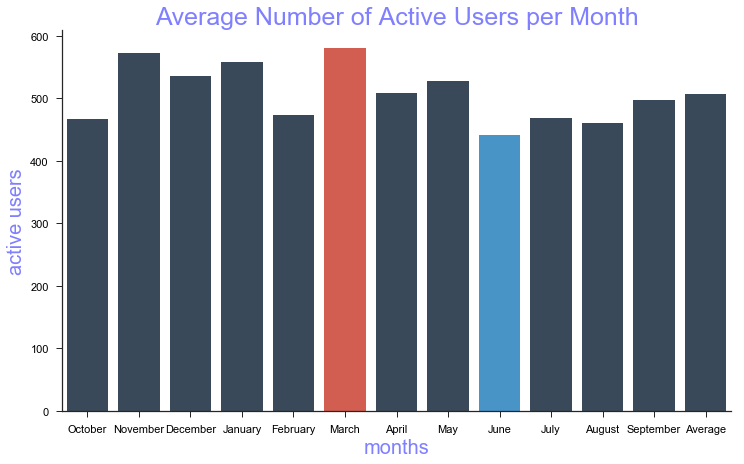

In [511]:
sns.set(style="ticks")

flatui = ["#34495e", "#34495e", "#34495e", "#34495e", "#34495e", "#e74c3c","#34495e","#34495e","#3498db","#34495e","#34495e","#34495e","#34495e"]

# This Function takes as input a custom palette
g = sns.barplot(x="Month", y="Active Users", palette=sns.color_palette(flatui),data=bloomfire_active_users_monthly,ci=None)

# remove the top and right line in graph
sns.despine()

# Set the size of the graph from here
g.figure.set_size_inches(12,7)
# Set the Title of the graph from here
g.axes.set_title('Average Number of Active Users per Month',
    fontsize=25,color="b",alpha=0.5)
# Set the xlabel of the graph from here
g.set_xlabel("months",size = 20,color="b",alpha=0.5)
# Set the ylabel of the graph from here
g.set_ylabel("active users",size = 20,color="b",alpha=0.5)
# Set the ticklabel size and color of the graph from here
g.tick_params(labelsize=11,labelcolor="black")

In [512]:
members_bloomfire_by_federation_fed = set(members_bloomfire_by_federation[members_bloomfire_by_federation['type']=='yes']['Organization'])
print(len(members_bloomfire_by_federation_fed))
print(round(len(members_bloomfire_by_federation_fed)/len(total_registered_fed)*100,2))

132
94.96


Users from 132 federations were active (logged in at least ones within the past year) in Bloomfire within the past year. It means that 95% of registered federations used FedCentral within the past year. Federations that weren't active in Bloomfire within the past year are displayed below:

In [513]:
for fed in total_registered_fed:
    if fed not in members_bloomfire_by_federation_fed:
        print(fed)

Jewish Federation of Durham-Chapel Hill
Merrimack Valley Jewish Federation
Jewish Federation of Greater Des Moines
Flint Jewish Federation
Jewish Community Alliance of Northeastern Pennsylvania
London Jewish Federation
Windsor Jewish Federation
Jewish Community Federation of the Mohawk Valley
Jewish Federation of Volusia & Flagler Counties
Jewish Federation of Sioux City


In [514]:
members_bloomfire_by_federation_net = set(members_bloomfire_by_federation[members_bloomfire_by_federation['type']=='no']['Organization'])
print(len(members_bloomfire_by_federation_net))
print(round(len(members_bloomfire_by_federation_net)/len(total_registered_net)*100,2))

32
68.09


Users from 32 networks were active (logged in at least ones within the past year) in Bloomfire within the past year. It means that 68% of registered federations used FedCentral within the past year. Networks that weren't active in Bloomfire within the past year are displayed below:

In [515]:
for net in total_registered_net:
    if net not in members_bloomfire_by_federation_net:
        print(net)

JCC-Federation of San Luis Obispo
Jewish Federation of Brevard & Indian River Counties
Jewish Community Center of York
Jewish Community Council of Greater Waco and Central Texas
GEORGIA
Atlantic Jewish Council
NEW HAMPSHIRE
Jewish Council for North Central Florida Inc
North Louisiana Jewish Federation
United Jewish Federation
Athens Jewish Welfare Fund
Jewish Federation of Huntsville & North Alabama
ALABAMA-NIUC
Jewish Federation of Lincoln
Jewish Federation of Greater Lafayette Inc
Ithaca Area United Jewish Community


In [516]:
bloomfire_users=pd.DataFrame()
bloomfire_users['category'] = ['total federations','federations registered in Bloomfire','federations active within the past year',]

In [517]:
bloomfire_users = pd.DataFrame(columns=['category','# registered','% registered','# active past year','% active past year'])
bloomfire_users['category'] = ['Users','Ferderations','Networks']
bloomfire_users['# registered'] = [len(members_bloomfire_total),len(total_registered_fed),len(total_registered_net)]
bloomfire_users['% registered'] = [round(len(members_bloomfire_total)*100/total_users,2), round(len(total_registered_fed)*100/len(federations_fed),2),round(len(total_registered_net)*100/len(federations_net),2)]
bloomfire_users['# active past year'] = [len(members_bloomfire),(len(members_bloomfire_by_federation_fed)),(len(members_bloomfire_by_federation_net))]
bloomfire_users['% active past year'] = [round(len(members_bloomfire)*100/fedcentral_users_past_year,2),round(len(members_bloomfire_by_federation_fed)*100/len(total_registered_fed),2),round(len(members_bloomfire_by_federation_net)*100/len(total_registered_net),2)]
bloomfire_users

,category,# registered,% registered,# active past year,% active past year
0,Users,2586,77.26,1426,81.77
1,Ferderations,139,96.53,132,94.96
2,Networks,47,15.93,32,68.09


 #### Contributions,Views, Coments, Hi-Fives and Follows.

1. Contributions,Views, Coments, Hi-Fives and Follows monthly statistics.

In [518]:
bloomfire_monthly_stats = pd.DataFrame()

bloomfire_monthly_stats['Month'] = ['October','November','December','January','February','March','April','May','June','July','August','September']

bloomfire_monthly_stats['# Users Contributions'] = [len(set(member_bloomfire_oct[member_bloomfire_oct['Contributions']>0]['Email'])),
                                       len(set(member_bloomfire_nov[member_bloomfire_nov['Contributions']>0]['Email'])),
                                      len(set(member_bloomfire_dec[member_bloomfire_dec['Contributions']>0]['Email'])),
                                      len(set(member_bloomfire_jan[member_bloomfire_jan['Contributions']>0]['Email'])),
                                      len(set(member_bloomfire_feb[member_bloomfire_feb['Contributions']>0]['Email'])),
                                      len(set(member_bloomfire_mar[member_bloomfire_mar['Contributions']>0]['Email'])),
                                      len(set(member_bloomfire_apr[member_bloomfire_apr['Contributions']>0]['Email'])),
                                      len(set(member_bloomfire_may[member_bloomfire_may['Contributions']>0]['Email'])),
                                      len(set(member_bloomfire_jun[member_bloomfire_jun['Contributions']>0]['Email'])),
                                      len(set(member_bloomfire_jul[member_bloomfire_jul['Contributions']>0]['Email'])),
                                      len(set(member_bloomfire_aug[member_bloomfire_aug['Contributions']>0]['Email'])),
                                      len(set(member_bloomfire_sep[member_bloomfire_sep['Contributions']>0]['Email']))]

bloomfire_monthly_stats['%'] = round(bloomfire_monthly_stats['# Users Contributions']/total_users,4)*100

bloomfire_monthly_stats['# Users Views'] = [len(set(member_bloomfire_oct[member_bloomfire_oct['Views']>0]['Email'])),
                                      len(set(member_bloomfire_nov[member_bloomfire_nov['Views']>0]['Email'])),
                                      len(set(member_bloomfire_dec[member_bloomfire_dec['Views']>0]['Email'])),
                                      len(set(member_bloomfire_jan[member_bloomfire_jan['Views']>0]['Email'])),
                                      len(set(member_bloomfire_feb[member_bloomfire_feb['Views']>0]['Email'])),
                                      len(set(member_bloomfire_mar[member_bloomfire_mar['Views']>0]['Email'])),
                                      len(set(member_bloomfire_apr[member_bloomfire_apr['Views']>0]['Email'])),
                                      len(set(member_bloomfire_may[member_bloomfire_may['Views']>0]['Email'])),
                                      len(set(member_bloomfire_jun[member_bloomfire_jun['Views']>0]['Email'])),
                                      len(set(member_bloomfire_jul[member_bloomfire_jul['Views']>0]['Email'])),
                                      len(set(member_bloomfire_aug[member_bloomfire_aug['Views']>0]['Email'])),
                                      len(set(member_bloomfire_sep[member_bloomfire_sep['Views']>0]['Email']))]

bloomfire_monthly_stats['% '] = round(bloomfire_monthly_stats['# Users Views']/total_users,4)*100

bloomfire_monthly_stats['# Users Follows'] = [len(set(member_bloomfire_oct[member_bloomfire_oct['Follows']>0]['Email'])),
                                      len(set(member_bloomfire_nov[member_bloomfire_nov['Follows']>0]['Email'])),
                                      len(set(member_bloomfire_dec[member_bloomfire_dec['Follows']>0]['Email'])),
                                      len(set(member_bloomfire_jan[member_bloomfire_jan['Follows']>0]['Email'])),
                                      len(set(member_bloomfire_feb[member_bloomfire_feb['Follows']>0]['Email'])),
                                      len(set(member_bloomfire_mar[member_bloomfire_mar['Follows']>0]['Email'])),
                                      len(set(member_bloomfire_apr[member_bloomfire_apr['Follows']>0]['Email'])),
                                      len(set(member_bloomfire_may[member_bloomfire_may['Follows']>0]['Email'])),
                                      len(set(member_bloomfire_jun[member_bloomfire_jun['Follows']>0]['Email'])),
                                      len(set(member_bloomfire_jul[member_bloomfire_jul['Follows']>0]['Email'])),
                                      len(set(member_bloomfire_aug[member_bloomfire_aug['Follows']>0]['Email'])),
                                      len(set(member_bloomfire_sep[member_bloomfire_sep['Follows']>0]['Email']))]

bloomfire_monthly_stats['%  '] = round(bloomfire_monthly_stats['# Users Follows']/total_users,4)*100

bloomfire_monthly_stats['# Users Comments'] = [len(set(member_bloomfire_oct[member_bloomfire_oct['Comments']>0]['Email'])),
                                      len(set(member_bloomfire_nov[member_bloomfire_nov['Comments']>0]['Email'])),
                                      len(set(member_bloomfire_dec[member_bloomfire_dec['Comments']>0]['Email'])),
                                      len(set(member_bloomfire_jan[member_bloomfire_jan['Comments']>0]['Email'])),
                                      len(set(member_bloomfire_feb[member_bloomfire_feb['Comments']>0]['Email'])),
                                      len(set(member_bloomfire_mar[member_bloomfire_mar['Comments']>0]['Email'])),
                                      len(set(member_bloomfire_apr[member_bloomfire_apr['Comments']>0]['Email'])),
                                      len(set(member_bloomfire_may[member_bloomfire_may['Comments']>0]['Email'])),
                                      len(set(member_bloomfire_jun[member_bloomfire_jun['Comments']>0]['Email'])),
                                      len(set(member_bloomfire_jul[member_bloomfire_jul['Comments']>0]['Email'])),
                                      len(set(member_bloomfire_aug[member_bloomfire_aug['Comments']>0]['Email'])),
                                      len(set(member_bloomfire_sep[member_bloomfire_sep['Comments']>0]['Email']))]

bloomfire_monthly_stats['%   '] = round(bloomfire_monthly_stats['# Users Comments']/total_users,4)*100

bloomfire_monthly_stats['# Users Hi-Fives'] = [len(set(member_bloomfire_oct[member_bloomfire_oct['Hi-Fives']>0]['Email'])),
                                      len(set(member_bloomfire_nov[member_bloomfire_nov['Hi-Fives']>0]['Email'])),
                                      len(set(member_bloomfire_dec[member_bloomfire_dec['Hi-Fives']>0]['Email'])),
                                      len(set(member_bloomfire_jan[member_bloomfire_jan['Hi-Fives']>0]['Email'])),
                                      len(set(member_bloomfire_feb[member_bloomfire_feb['Hi-Fives']>0]['Email'])),
                                      len(set(member_bloomfire_mar[member_bloomfire_mar['Hi-Fives']>0]['Email'])),
                                      len(set(member_bloomfire_apr[member_bloomfire_apr['Hi-Fives']>0]['Email'])),
                                      len(set(member_bloomfire_may[member_bloomfire_may['Hi-Fives']>0]['Email'])),
                                      len(set(member_bloomfire_jun[member_bloomfire_jun['Hi-Fives']>0]['Email'])),
                                      len(set(member_bloomfire_jul[member_bloomfire_jul['Hi-Fives']>0]['Email'])),
                                      len(set(member_bloomfire_aug[member_bloomfire_aug['Hi-Fives']>0]['Email'])),
                                      len(set(member_bloomfire_sep[member_bloomfire_sep['Hi-Fives']>0]['Email']))]

bloomfire_monthly_stats['%    '] = round(bloomfire_monthly_stats['# Users Hi-Fives']/total_users,4)*100

bloomfire_monthly_stats.loc[12] = ['Average', bloomfire_monthly_stats['# Users Contributions'].mean(),bloomfire_monthly_stats['%'].mean(),
                                  bloomfire_monthly_stats['# Users Views'].mean(), bloomfire_monthly_stats['% '].mean(),
                                  bloomfire_monthly_stats['# Users Follows'].mean(), bloomfire_monthly_stats['%  '].mean(),
                                  bloomfire_monthly_stats['# Users Comments'].mean(), bloomfire_monthly_stats['%   '].mean(),
                                  bloomfire_monthly_stats['# Users Hi-Fives'].mean(), bloomfire_monthly_stats['%    '].mean()]                                        

bloomfire_monthly_stats[['%','% ','%  ','%   ','%    ']] = round(bloomfire_monthly_stats[['%','% ','%  ','%   ','%    ']],2)
bloomfire_monthly_stats[['# Users Contributions','# Users Views','# Users Follows','# Users Comments','# Users Hi-Fives']] = round(bloomfire_monthly_stats[['# Users Contributions','# Users Views','# Users Follows','# Users Comments','# Users Hi-Fives']],0)
bloomfire_monthly_stats


,Month,# Users Contributions,%,# Users Views,%,# Users Follows,%,# Users Comments,%,# Users Hi-Fives,%
0,October,77.0,2.30,380.0,11.35,101.0,3.02,2.0,0.06,4.0,0.12
1,November,78.0,2.33,485.0,14.49,102.0,3.05,5.0,0.15,2.0,0.06
2,December,79.0,2.36,472.0,14.10,112.0,3.35,10.0,0.30,3.0,0.09
3,January,106.0,3.17,493.0,14.73,143.0,4.27,14.0,0.42,2.0,0.06
4,February,51.0,1.52,397.0,11.86,91.0,2.72,7.0,0.21,2.0,0.06
5,March,86.0,2.57,537.0,16.04,118.0,3.53,11.0,0.33,2.0,0.06
6,April,65.0,1.94,446.0,13.33,90.0,2.69,2.0,0.06,4.0,0.12
7,May,71.0,2.12,456.0,13.62,98.0,2.93,2.0,0.06,2.0,0.06
8,June,48.0,1.43,372.0,11.11,67.0,2.00,4.0,0.12,3.0,0.09
9,July,83.0,2.48,394.0,11.77,114.0,3.41,3.0,0.09,1.0,0.03


See the last row for average numbers.

2. Contributions,Views, Coments, Hi-Fives and Follows within the past year.

In [519]:
contributions = pd.read_csv('contributions_2019.csv')
questions = pd.read_csv('questions_2019.csv')

In [520]:
table2 = pd.DataFrame(columns=['Type','Total','# federations','% federations'])

table2['Type'] = ['Contributions(Posts+Questions)','Views','Comments','Hi-Fives','Follows']

total_contributions = members_bloomfire_by_federation['Contributions'].sum()
total_views = members_bloomfire_by_federation['Views'].sum()
total_comments = members_bloomfire_by_federation['Comments'].sum()
total_hi_fives = members_bloomfire_by_federation['Hi-Fives'].sum()
total_follows = members_bloomfire_by_federation['Follows'].sum()
table2['Total'] = [total_contributions,total_views,total_comments,total_hi_fives,total_follows]

contributions_fed = set(members_bloomfire_by_federation[(members_bloomfire_by_federation['Contributions']>0) & (members_bloomfire_by_federation['type']=='yes')]['Organization'])
views_bloomfire_fed = set(members_bloomfire_by_federation[(members_bloomfire_by_federation['Views']>0) & (members_bloomfire_by_federation['type']=='yes')]['Organization'])
comments_fed = set(members_bloomfire_by_federation[(members_bloomfire_by_federation['Comments']>0) & (members_bloomfire_by_federation['type']=='yes')]['Organization'])
hi_fives_fed = set(members_bloomfire_by_federation[(members_bloomfire_by_federation['Hi-Fives']>0) & (members_bloomfire_by_federation['type']=='yes')]['Organization'])
follows_fed = set(members_bloomfire_by_federation[(members_bloomfire_by_federation['Follows']>0) & (members_bloomfire_by_federation['type']=='yes')]['Organization'])
table2['# federations'] = [len(contributions_fed),len(views_bloomfire_fed),len(comments_fed),len(hi_fives_fed),len(follows_fed)]

table2['% federations'] = [round(len(contributions_fed)*100/len(total_registered_fed),2),round(len(views_bloomfire_fed)*100/len(total_registered_fed),2),round(len(comments_fed)*100/len(total_registered_fed),2),round(len(hi_fives_fed)*100/len(total_registered_fed),2),round(len(follows_fed)*100/len(total_registered_fed),2)]

contributions_net = set(members_bloomfire_by_federation[(members_bloomfire_by_federation['Contributions']>0) & (members_bloomfire_by_federation['type']=='no')]['Organization'])
views_net = set(members_bloomfire_by_federation[(members_bloomfire_by_federation['Views']>0) & (members_bloomfire_by_federation['type']=='no')]['Organization'])
comments_net = set(members_bloomfire_by_federation[(members_bloomfire_by_federation['Comments']>0) & (members_bloomfire_by_federation['type']=='no')]['Organization'])
hi_fives_net = set(members_bloomfire_by_federation[(members_bloomfire_by_federation['Hi-Fives']>0) & (members_bloomfire_by_federation['type']=='no')]['Organization'])
follows_net = set(members_bloomfire_by_federation[(members_bloomfire_by_federation['Follows']>0) & (members_bloomfire_by_federation['type']=='no')]['Organization'])
table2['# networks'] = [len(contributions_net),len(views_net),len(comments_net),len(hi_fives_net),len(follows_net)]
table2['% networks'] = [round(len(contributions_net)*100/len(total_registered_net),2),round(len(views_net)*100/len(total_registered_net),2),round(len(comments_net)*100/len(total_registered_net),2),round(len(hi_fives_net)*100/len(total_registered_net),2),round(len(follows_net)*100/len(total_registered_net),2)]
table2

,Type,Total,# federations,% federations,# networks,% networks
0,Contributions(Posts+Questions),1329,112,80.58,11,23.40
1,Views,21330,129,92.81,30,63.83
2,Comments,98,46,33.09,4,8.51
3,Hi-Fives,33,20,14.39,2,4.26
4,Follows,1975,114,82.01,14,29.79


In [521]:
table3 = pd.DataFrame()
table3['Type'] = ['Active Contributions (Post, Questions, Comments)','Passive Contributions (Views, Hi-Fives, Follows)']
table3['Total'] = [members_bloomfire_by_federation['Contributions'].sum() + members_bloomfire_by_federation['Comments'].sum(),
                   members_bloomfire_by_federation['Views'].sum() + members_bloomfire_by_federation['Hi-Fives'].sum() + members_bloomfire_by_federation['Follows'].sum()]
table3['# users'] = [len(set(members_bloomfire_by_federation[(members_bloomfire_by_federation['Contributions']>0) | (members_bloomfire_by_federation['Comments']>0)]['Email'])),
                    len(set(members_bloomfire_by_federation[(members_bloomfire_by_federation['Hi-Fives']>0) | (members_bloomfire_by_federation['Follows']>0)
                    | (members_bloomfire_by_federation['Views']>0)]['Email']))]
table3['% active users'] = [len(set(members_bloomfire_by_federation[(members_bloomfire_by_federation['Contributions']>0) | (members_bloomfire_by_federation['Comments']>0)]['Email']))/555,
                    len(set(members_bloomfire_by_federation[(members_bloomfire_by_federation['Hi-Fives']>0) | (members_bloomfire_by_federation['Follows']>0)/555
                    | (members_bloomfire_by_federation['Views']>0)]['Email']))/len(members_bloomfire_total)]
table3['% active users'] = round(table3['% active users'],4)*100
table3['% registered users'] = [len(set(members_bloomfire_by_federation[(members_bloomfire_by_federation['Contributions']>0) | (members_bloomfire_by_federation['Comments']>0)]['Email']))/total_users,
                    len(set(members_bloomfire_by_federation[(members_bloomfire_by_federation['Hi-Fives']>0) | (members_bloomfire_by_federation['Follows']>0)
                    | (members_bloomfire_by_federation['Views']>0)]['Email']))/total_users]
table3['% registered users'] = round(table3['% registered users'],4)*100

table3['# federations'] = [len(set(members_bloomfire_by_federation[((members_bloomfire_by_federation['Contributions']>0) | (members_bloomfire_by_federation['Comments']>0)) & (members_bloomfire_by_federation['type']=='yes')]['code'])),
                           len(set(members_bloomfire_by_federation[((members_bloomfire_by_federation['Views']>0) | (members_bloomfire_by_federation['Follows']>0) | (members_bloomfire_by_federation['Hi-Fives']>0)) & (members_bloomfire_by_federation['type']=='yes')]['code']))]
table3['% federations'] = round(table3['# federations']/len(federations_fed),4)*100

table3['# networks'] = [len(set(members_bloomfire_by_federation[((members_bloomfire_by_federation['Contributions']>0) | (members_bloomfire_by_federation['Comments']>0)) & (members_bloomfire_by_federation['type']=='no')]['code'])),
                           len(set(members_bloomfire_by_federation[((members_bloomfire_by_federation['Views']>0) | (members_bloomfire_by_federation['Follows']>0) | (members_bloomfire_by_federation['Hi-Fives']>0)) & (members_bloomfire_by_federation['type']=='no')]['code']))]
table3['% networks'] = round(table3['# networks']/len(federations_net),4)*100

table3

,Type,Total,# users,% active users,% registered users,# federations,% federations,# networks,% networks
0,"Active Contributions (Post, Questions, Comments)",1427,441,79.46,13.18,113,78.47,11,3.73
1,"Passive Contributions (Views, Hi-Fives, Follows)",23338,1263,48.84,37.74,130,90.28,37,12.54


See statistics for contributions below:

In [522]:
post = len(contributions[contributions['Type']=='Post'])
question = len(contributions[contributions['Type']=='Question'])
contributions_stats = pd.DataFrame()
contributions_stats['Contribution Type'] = ['Post','Question']
contributions_stats['Total'] = [post,question]
contributions_stats['# Views'] = [contributions[contributions['Type']=='Post']['Total Views'].sum(), contributions[contributions['Type']=='Question']['Total Views'].sum()]

In [523]:
contributions_stats

,Contribution Type,Total,# Views
0,Post,498,6857
1,Question,987,14167


See statistics for questions below:

In [524]:
questions_stats = pd.DataFrame()
questions_stats['characteristics'] = ['% of answered questions','Average Time to First Answer in mins',
                                      'Average Answers','Average Answer Hi-Fives']
questions_stats['values'] = [round(len(questions[questions['Status']=='Answered'])*100/len(questions),2),
                             round((questions['Time to First Answer']/60).median(),0), round(questions['Total Answers'].mean(),2),
                             round(questions['Answer Hi-Fives'].mean())]
questions_stats

,characteristics,values
0,% of answered questions,77.86
1,Average Time to First Answer in mins,29.00
2,Average Answers,2.79
3,Average Answer Hi-Fives,0.00


See daily statistics below:

In [525]:
daily_stats = pd.DataFrame()
daily_engagement = pd.read_csv('daily_engagement_2019.csv')
daily_stats['characteristics'] = ['Daily Average Active Members','Daily Average Contributing Members', 'Daily Average Total Contributions',
                                    'Daily Average Total Views']
daily_stats['values'] = [round(daily_engagement['Active Members'].mean(),2),
                         round(daily_engagement['Contributing Members'].mean(),0),round(daily_engagement['Total Contributions'].mean(),2),
                         round(daily_engagement['Total Views'].mean(),2)]
daily_stats

,characteristics,values
0,Daily Average Active Members,42.80
1,Daily Average Contributing Members,3.00
2,Daily Average Total Contributions,3.62
3,Daily Average Total Views,58.31


### Assets

In [526]:
assets1 = pd.read_csv('Fedcentral_Assets.csv') 
assets1['ID'] =  assets1['ID'].str.replace('https://fedcentral.org/assets/view/','')
assets1 = assets1[assets1['Date Uploaded']!='NaN']
assets1 = assets1[assets1['Date Uploaded']!='1935']
assets1 = assets1[assets1['Date Uploaded'].str.contains('[A-Za-z]')==False]
assets1['Date Uploaded'] = assets1['Date Uploaded'].str.split(' ',expand = True)[0]
assets1 = assets1[pd.isnull(assets1['Date Uploaded'])==False]
assets1['Date Uploaded'] = pd.to_datetime(assets1['Date Uploaded'], format ='%m/%d/%y')


assets2 = pd.read_csv('fedcentral-assets-may.csv', error_bad_lines=False) 
assets2 = assets2[assets2['ID'].str.isdigit()==True]
assets2 = assets2[assets2['Date Uploaded']!='NaN']
assets2 = assets2[assets2['Date Uploaded']!='1935']
assets2 = assets2[assets2['Date Uploaded'].str.contains('[A-Za-z]')==False]
assets2['Date Uploaded'] = assets2['Date Uploaded'].str.split(' ',expand = True)[0]
assets2 = assets2[pd.isnull(assets2['Date Uploaded'])==False]
assets2['Date Uploaded'] = pd.to_datetime(assets2['Date Uploaded'], format ='%Y-%m-%d')



assets = pd.concat([assets1, assets2],sort=False).drop_duplicates('ID').reset_index(drop=True)


b'Skipping line 277: expected 22 fields, saw 25\nSkipping line 288: expected 22 fields, saw 25\nSkipping line 319: expected 22 fields, saw 23\nSkipping line 416: expected 22 fields, saw 25\nSkipping line 418: expected 22 fields, saw 23\nSkipping line 419: expected 22 fields, saw 23\nSkipping line 454: expected 22 fields, saw 24\nSkipping line 456: expected 22 fields, saw 24\nSkipping line 468: expected 22 fields, saw 23\nSkipping line 888: expected 22 fields, saw 23\nSkipping line 1698: expected 22 fields, saw 23\nSkipping line 1726: expected 22 fields, saw 23\nSkipping line 1746: expected 22 fields, saw 23\nSkipping line 1750: expected 22 fields, saw 24\nSkipping line 1754: expected 22 fields, saw 23\nSkipping line 1759: expected 22 fields, saw 27\nSkipping line 1780: expected 22 fields, saw 23\nSkipping line 1827: expected 22 fields, saw 23\nSkipping line 1828: expected 22 fields, saw 24\nSkipping line 1829: expected 22 fields, saw 23\nSkipping line 1835: expected 22 fields, saw 24\n

In [527]:
assets_yearly = assets[assets['Date Uploaded'] < '2020/1/1']
assets_past_year_by_federations = pd.merge(assets_yearly,fedcentral_users_by_federation[['Email','code','name','type']],how='left',left_on='Author (email)',right_on='Email')
assets_yearly.set_index('Date Uploaded',inplace=True)
assets_past_year_by_federations.set_index('Date Uploaded',inplace=True)

See assets statistics below:

In [533]:
assets_added_by_fed = assets_past_year_by_federations[(assets_past_year_by_federations['code']!='JFNA') & pd.notna(assets_past_year_by_federations['code'])
                                                     & (assets_past_year_by_federations.index < '2020/1/1')]
assets_added = pd.DataFrame(assets_yearly.resample('Y')['ID'].count())
assets_added.reset_index(inplace=True)
assets_added.columns=[['Year','# Assets Added']]
assets_added['Year'] = ['2015','2016','2017','2018','2019']
assets_cumsum = pd.DataFrame(assets_yearly.resample('Y')['ID'].count().cumsum())
assets_added['Total Assets'] = assets_cumsum['ID'].values
assets_added['# Assets by fed'] = list(assets_added_by_fed.resample('Y').count()['ID'].values)
assets_added['# Total by fed'] = assets_added['# Assets by fed'].cumsum()
assets_added['% all uploaded'] = round(assets_added['# Total by fed']*100/assets_added['Total Assets'].values,2)
assets_past_year_by_federations
#assets_added['# of federations uploaded assests'] = assets_past_year_by_federations[assets_past_year_by_federations['type']=='yes'].resample('Y')['name'].nunique().values
#assets_added['# of networks uploaded assests'] = assets_past_year_by_federations[assets_past_year_by_federations['type']=='no'].resample('Y')['name'].nunique().values
assets_added['% of change'] = assets_added['Total Assets'].pct_change()*100

assets_added

,Year,# Assets Added,Total Assets,# Assets by fed,# Total by fed,% all uploaded,% of change
0,2015,2067,2067,4,4,0.19,NaN
1,2016,1423,3490,241,245,7.02,68.843735
2,2017,1778,5268,86,331,6.28,50.945559
3,2018,904,6172,73,404,6.55,17.160213
4,2019,318,6490,41,445,6.86,5.152301


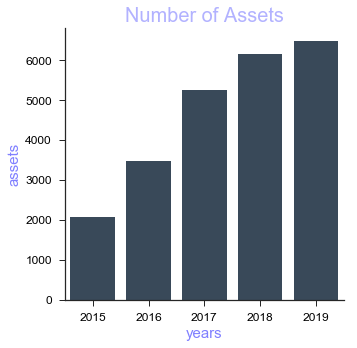

In [534]:
assets_added = pd.DataFrame({'Year':assets_added['Year'].iloc[:, 0].tolist(),'Total Assets':assets_added['Total Assets'].iloc[:, 0].tolist()})
sns.set(style="ticks")

flatui = ["#34495e"]

# This Function takes as input a custom palette
g = sns.barplot(x='Year', y='Total Assets', palette=sns.color_palette(flatui),data=assets_added, ci=None)

# remove the top and right line in graph
sns.despine()

# Set the size of the graph from here
g.figure.set_size_inches(5,5)
# Set the Title of the graph from here
g.axes.set_title('Number of Assets',
    fontsize=20,color="b",alpha=0.3)
# Set the xlabel of the graph from here
g.set_xlabel("years",size = 15,color="b",alpha=0.5)
# Set the ylabel of the graph from here
g.set_ylabel("assets",size = 15,color="b",alpha=0.5)
# Set the ticklabel size and color of the graph from here
g.tick_params(labelsize=12,labelcolor="black")

## Federation Report (Snapshot of Data on a Per Federation Basis)

### Combined Jewish Philanthropies of Greater Boston Inc.

#### Number of registered FedCentral users

In [535]:
table = pd.DataFrame(columns=['admins','values'])
active_fedcentral = len(set(fedcentral_users_by_federation[(fedcentral_users_by_federation['Last Login']>'09/30/2018') & 
                                       (fedcentral_users_by_federation['Last Login']<'10/1/2019') & 
                                       (fedcentral_users_by_federation['code']=='22100')]['Email']))
active_bloomfire = members_bloomfire_by_federation[members_bloomfire_by_federation['code']=='22100']['Email'].nunique()
members_bloomfire_by_federation[members_bloomfire_by_federation['code']=='22100']
total_fedcentral = len(set(fedcentral_users_by_federation[fedcentral_users_by_federation['code']=='22100']['Email']))
table['admins'] = ['# admins','# registered FedCentral (and Bloomfire) users',
                   '# FedCentral active users past year','% FedCentral active past year',
                  '# Bloomfire active users past year','% Bloomfire active past year']
table['values'] = [31, total_fedcentral, active_fedcentral, round(active_fedcentral*100/total_fedcentral,2),
                  active_bloomfire,round(active_bloomfire*100/total_fedcentral,2)]
table

,admins,values
0,# admins,31.00
1,# registered FedCentral (and Bloomfire) users,68.00
2,# FedCentral active users past year,24.00
3,% FedCentral active past year,35.29
4,# Bloomfire active users past year,12.00
5,% Bloomfire active past year,17.65


In [537]:
views_fed['Pageviews'] = views_fed['Pageviews']
views_fed['Pageviews'] = pd.to_numeric(views_fed['Pageviews'])

table = pd.DataFrame()
table['characteristics'] = ['# views past year','# assets downloads past year','# assets downloads+views past year','# searches past year']
table['values'] = [views_fed[views_fed['code']=='22100']['Pageviews'].sum(),
                   downloads_fed[downloads_fed['User Organization']=='22100']['Total Events'].sum(),
                   views_fed[(views_fed['Page'].str.contains('/view')) & (views_fed['User Organization']=='22100')]['Pageviews'].sum() + downloads_fed[downloads_fed['User Organization']=='22100']['Total Events'].sum(),
                   searches_fed[searches_fed['User Organization']=='22100']['Total Events'].sum()]
table

,characteristics,values
0,# views past year,188.0
1,# assets downloads past year,84.0
2,# assets downloads+views past year,104.0
3,# searches past year,195.0
